## Team Member Names: Madeline Witters {-}

## Project Title: Predicting Customer Churn and Identifying Attributes of At-Risk Customers {-}

**Exploratory Data Analysis**

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.linear_model import LogisticRegressionCV

In [2]:
data = pd.read_csv("Bank Customer Churn Prediction.csv")
data = data.drop("customer_id", axis=1)
data.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
data.dtypes

credit_score          int64
country              object
gender               object
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
dtype: object

In [4]:
#EDA to do list: 
# drop customer_id column DONE
# check for missing data DONE
# create boxplots for categorical variables DONE
# create density plots/histograms for quantitative vars DONE
#One Hot encoding: gender, country, Balance DONE

#info on why it's best to not do too much one-hot encoding for trees: 
#https://towardsdatascience.com/one-hot-encoding-is-making-your-tree-based-ensembles-worse-heres-why-d64b282b5769

#11/17 TO DO LIST: 

#outlier removal (do before standardization): 
#https://medium.com/geekculture/essential-guide-to-handle-outliers-for-your-logistic-regression-model-63c97690a84d

#check for multicollinearity: corr plot? DONE

#create mosaic plots for categorical vars created bar plots -- need to create mosaic plots

#create additional boxplots for numerical vars DONE

#split into train/test DONE

#standardize data DONE

#Lasso variable selection DONE (conduct research on what vars to include: perhaps simply include all for now ?)

#Create Logistic regression model

#Create RF model
#   -identify most important vars in RF

In [5]:
null_check = data.isnull().any() #no missing data in the dataframe
null_check

credit_score        False
country             False
gender              False
age                 False
tenure              False
balance             False
products_number     False
credit_card         False
active_member       False
estimated_salary    False
churn               False
dtype: bool

In [6]:
#data.min()

In [7]:
#data.max()

<AxesSubplot:xlabel='churn', ylabel='estimated_salary'>

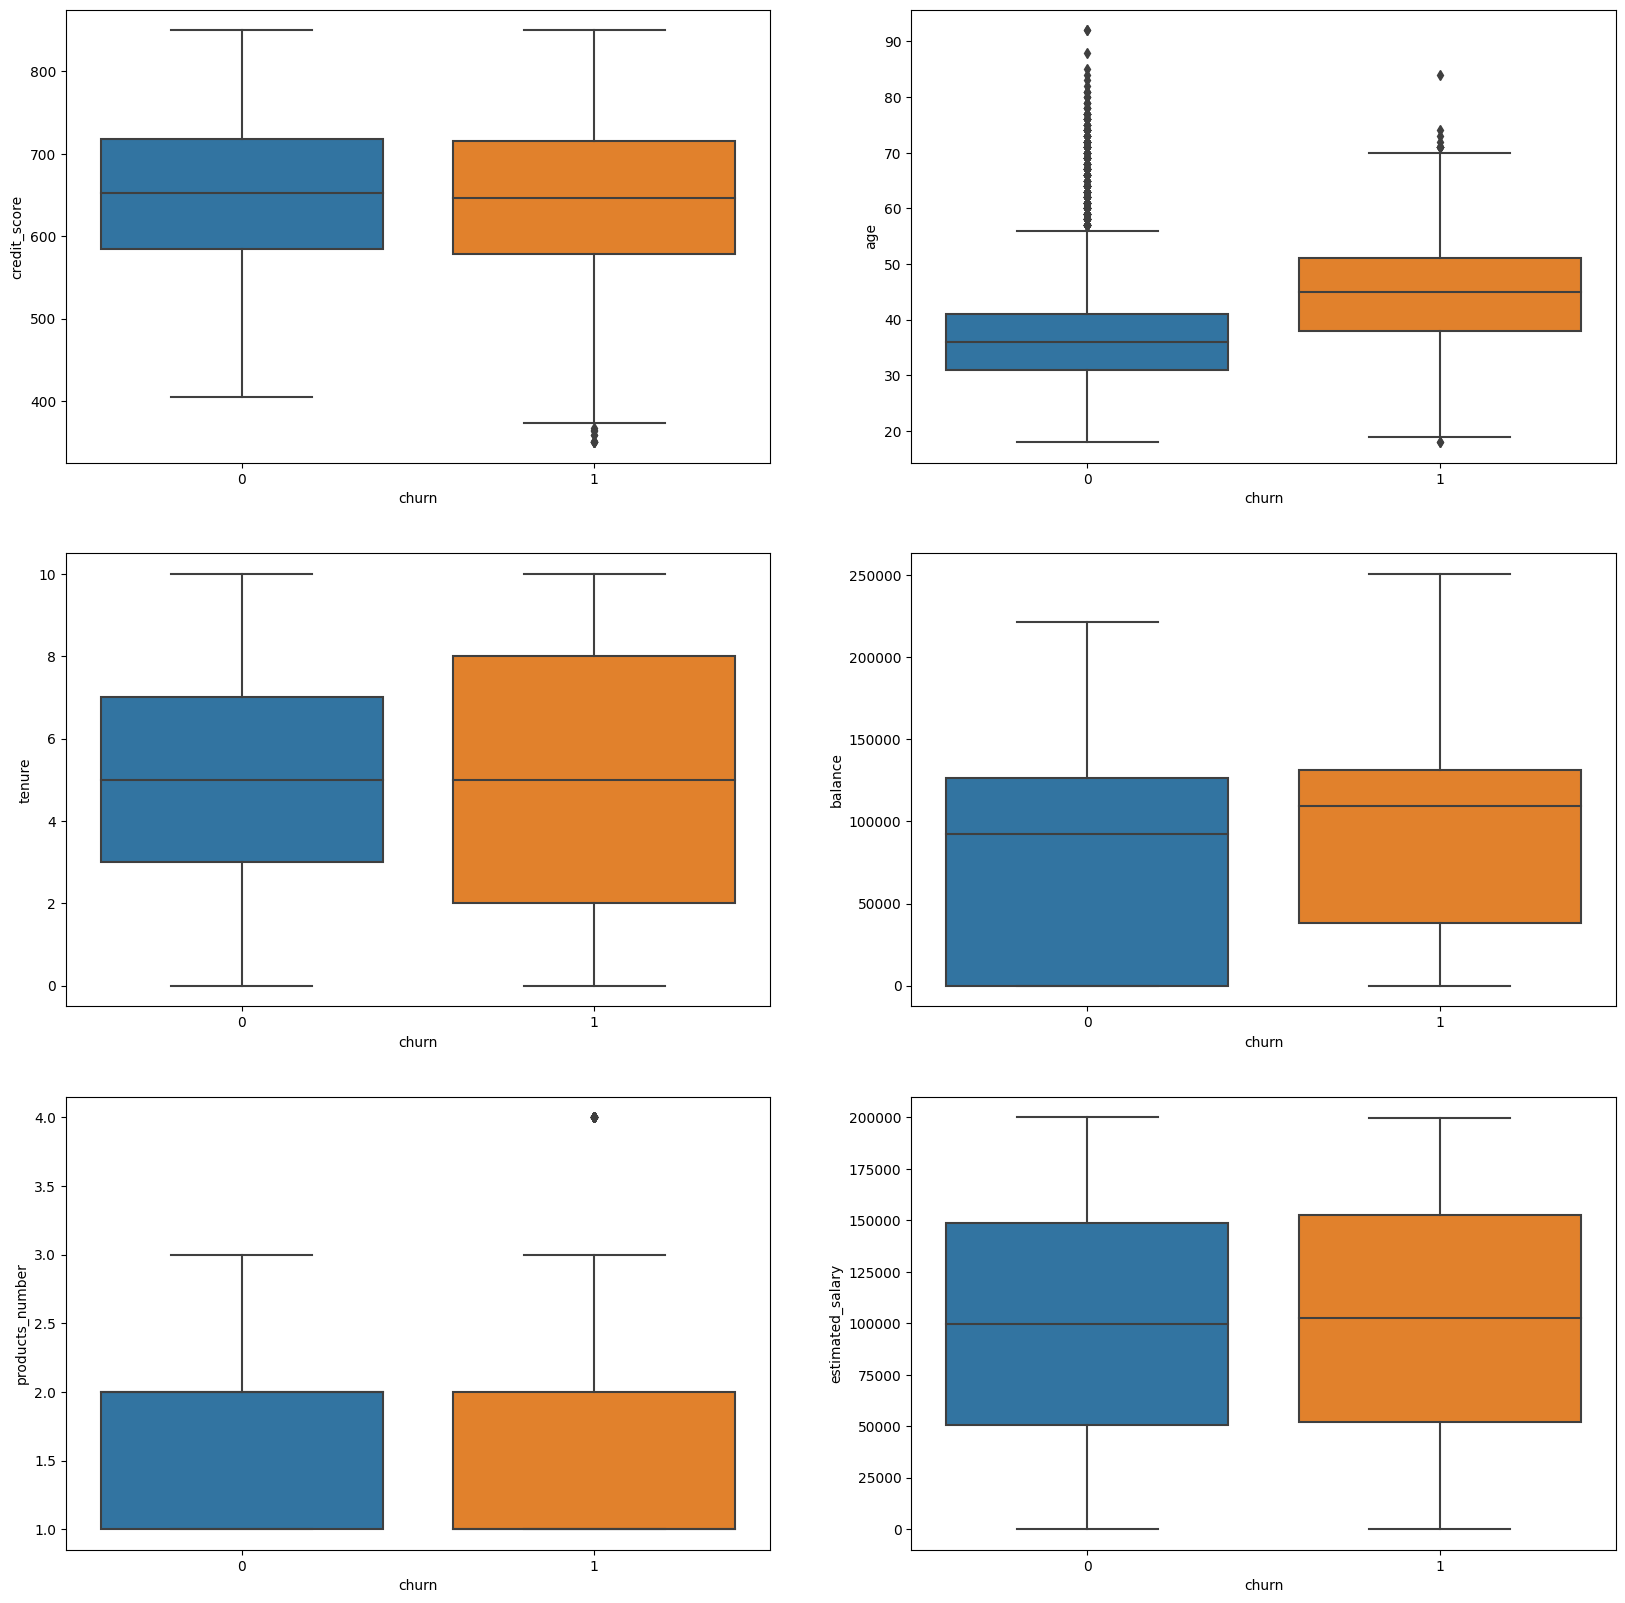

In [8]:
plt.figure(figsize=(20,20))
#plt.title("Boxplots of Numeric Dependent Variables") try to add in tile later ?

plt.subplot(3,2,1)
sns.boxplot(x='churn', y='credit_score', data=data)

plt.subplot(3,2,2)
sns.boxplot(x='churn', y='age', data=data)

plt.subplot(3,2,3)
sns.boxplot(x='churn', y='tenure', data=data)

plt.subplot(3,2,4)
sns.boxplot(x='churn', y='balance', data=data)

plt.subplot(3,2,5)
sns.boxplot(x='churn', y='products_number', data=data)

plt.subplot(3,2,6)
sns.boxplot(x='churn', y='estimated_salary', data=data)

<AxesSubplot:xlabel='balance', ylabel='Count'>

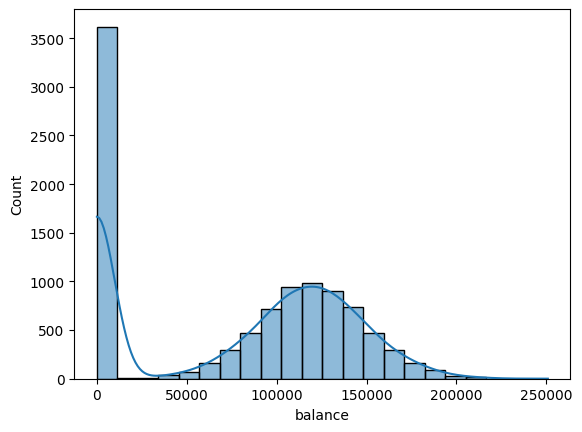

In [9]:
sns.histplot(data=data, x="balance", kde=True)

In [10]:
data['churn'].value_counts()

0    7963
1    2037
Name: churn, dtype: int64

<AxesSubplot:xlabel='active_member', ylabel='count'>

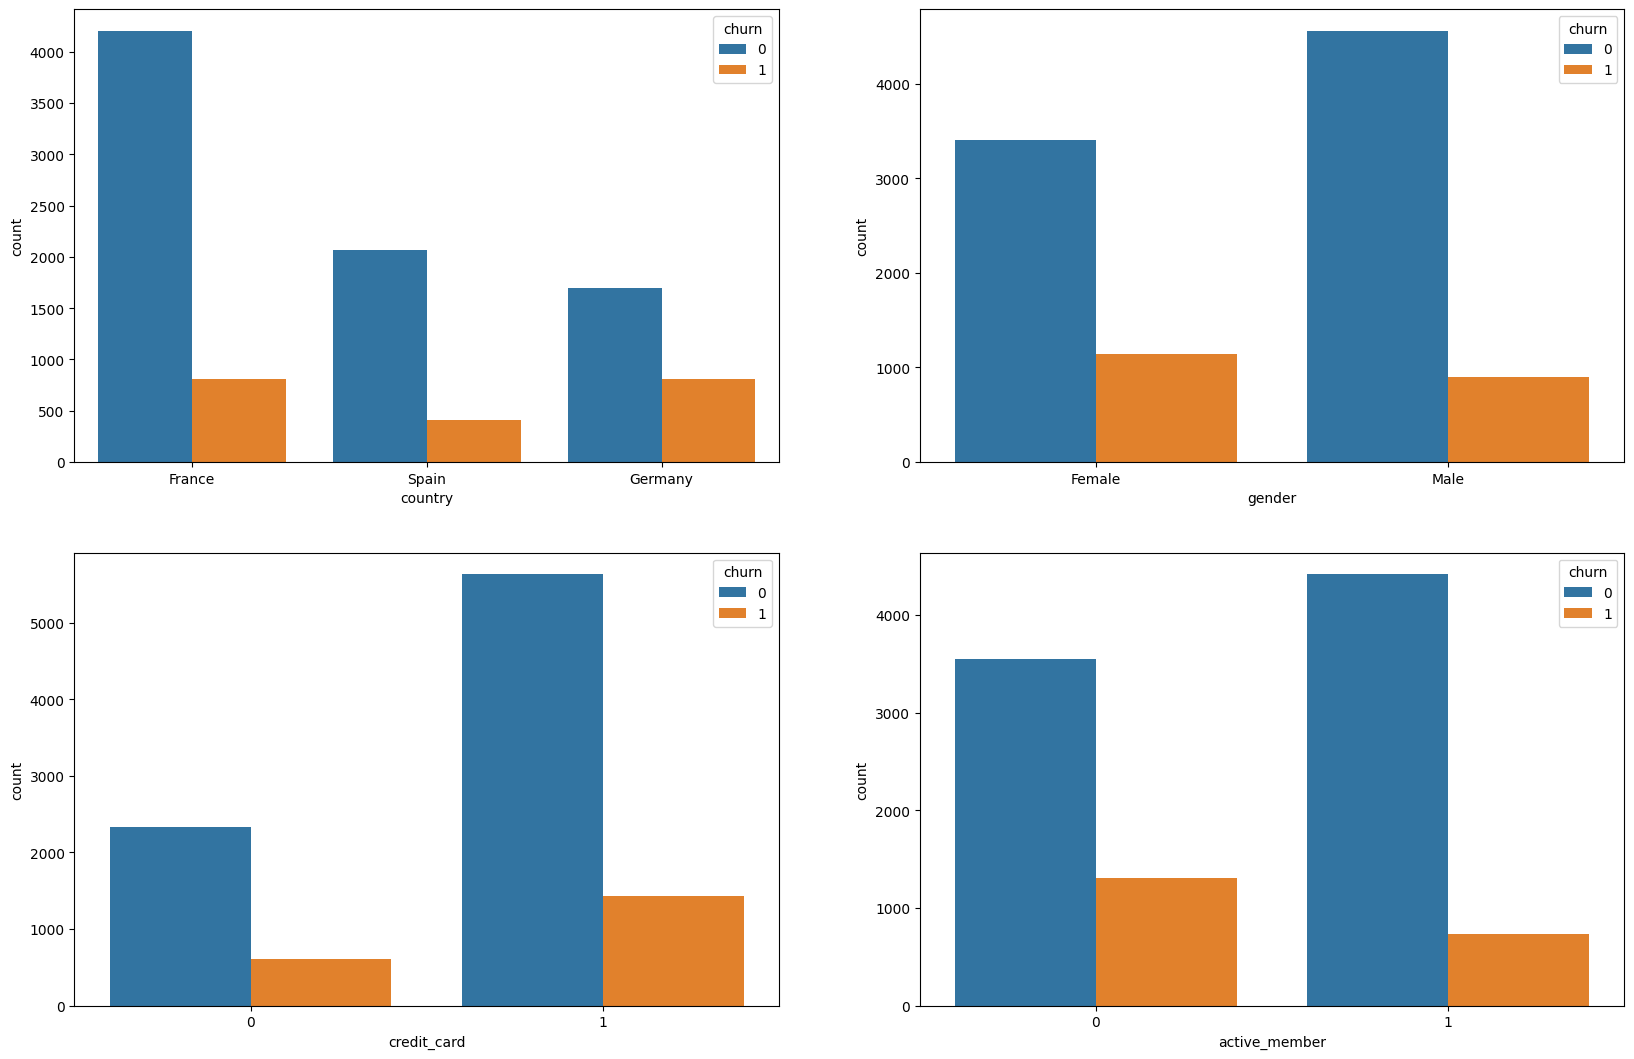

In [11]:
plt.figure(figsize=(20,20))
#plt.title("Boxplots of Numeric Dependent Variables") try to add in tile later ?

plt.subplot(3,2,1)
sns.countplot(data=data, x="country", hue="churn")

plt.subplot(3,2,2)
sns.countplot(data=data, x="gender", hue="churn")

plt.subplot(3,2,3)
sns.countplot(data=data, x="credit_card", hue="churn")

plt.subplot(3,2,4)
sns.countplot(data=data, x="active_member", hue="churn")

In [12]:
crosstable = pd.crosstab(data['churn'], data['gender'])
crosstable

gender,Female,Male
churn,,
0,3404,4559
1,1139,898


(<Figure size 640x480 with 3 Axes>,
 {('1', '1'): (0.0, 0.0, 0.5125373134328359, 0.14221668404870583),
  ('1', '0'): (0.0,
   0.14553894318491845,
   0.5125373134328359,
   0.8544610568150816),
  ('0', '1'): (0.5175124378109454,
   0.0,
   0.48248756218905475,
   0.2676169145400394),
  ('0', '0'): (0.5175124378109454,
   0.27093917367625203,
   0.48248756218905475,
   0.7290608263237479)})

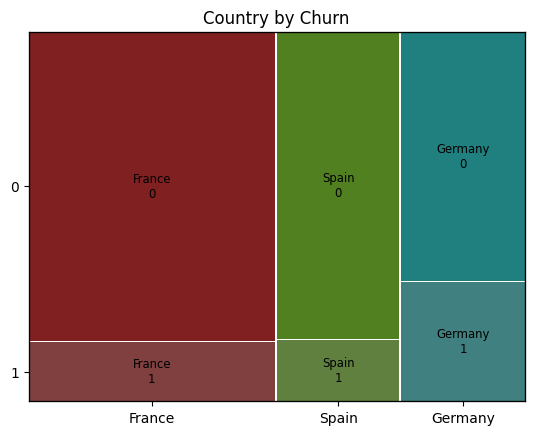

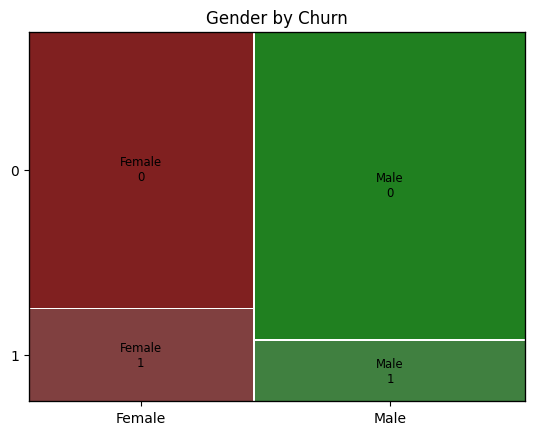

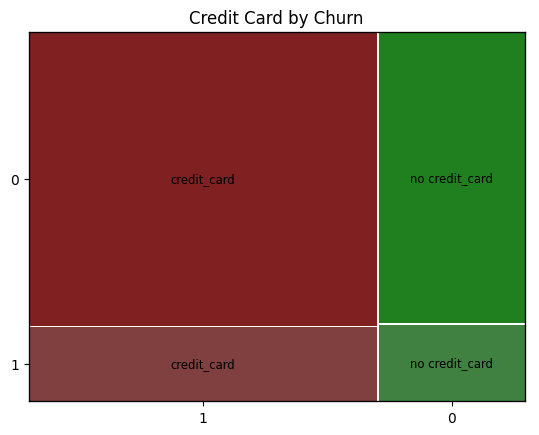

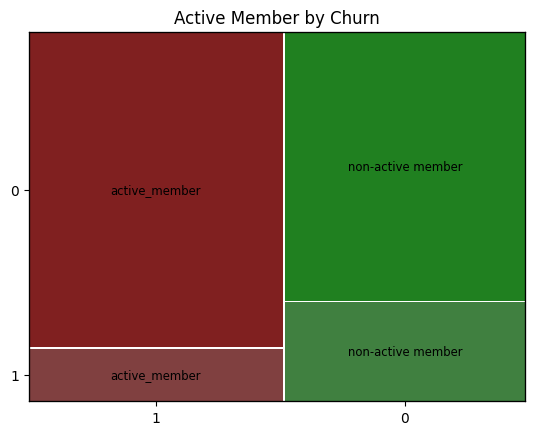

In [13]:
mosaic(data, ['country', 'churn'], title="Country by Churn")
mosaic(data, ['gender', 'churn'], title="Gender by Churn")
labelizer = lambda k: {('0','0'): 'no credit_card', ('0','1'): 'no credit_card', ('1','0'): 'credit_card',('1','1'): 'credit_card'}[k]
mosaic(data, ['credit_card', 'churn'], labelizer =labelizer, title="Credit Card by Churn")
labels = lambda k: {('0','0'): 'non-active member', ('0','1'): 'non-active member', ('1','0'): 'active_member',('1','1'): 'active_member'}[k]
mosaic(data, ['active_member', 'churn'], labelizer=labels, title="Active Member by Churn")

In [14]:
g_one_hot = pd.get_dummies(data['gender'])
g_one_hot.head()

,Female,Male
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [15]:
data = data.drop('gender',axis = 1)
# Join the encoded df
data = data.join(g_one_hot)
data.head()

,credit_score,country,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,Female,Male
0,619,France,42,2,0.00,1,1,1,101348.88,1,1,0
1,608,Spain,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,France,42,8,159660.80,3,1,0,113931.57,1,1,0
3,699,France,39,1,0.00,2,0,0,93826.63,0,1,0
4,850,Spain,43,2,125510.82,1,1,1,79084.10,0,1,0


In [16]:
c_one_hot = pd.get_dummies(data['country'])
#c_one_hot.head()

In [17]:
data2 = data.drop('country',axis = 1)
data2 = data2.join(c_one_hot)
#data2.head()

In [18]:
data2['zero_balance'] = np.where(data2['balance'] == 0.0, 1, 0) #leave this for later on! 

In [19]:
#data2.head()

In [20]:
data2 = data2.drop('balance',axis = 1)

In [21]:
first_column = data2.pop('churn')
data2.insert(0, 'churn', first_column)

In [22]:
data2.head()

,churn,credit_score,age,tenure,products_number,credit_card,active_member,estimated_salary,Female,Male,France,Germany,Spain,zero_balance
0,1,619,42,2,1,1,1,101348.88,1,0,1,0,0,1
1,0,608,41,1,1,0,1,112542.58,1,0,0,0,1,0
2,1,502,42,8,3,1,0,113931.57,1,0,1,0,0,0
3,0,699,39,1,2,0,0,93826.63,1,0,1,0,0,1
4,0,850,43,2,1,1,1,79084.10,1,0,0,0,1,0


In [23]:
data2.dtypes

churn                 int64
credit_score          int64
age                   int64
tenure                int64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
Female                uint8
Male                  uint8
France                uint8
Germany               uint8
Spain                 uint8
zero_balance          int64
dtype: object

In [24]:
numeric_vars = data2[['churn', 'credit_score', 'age', 'tenure','products_number', 'estimated_salary']]

In [25]:
corr_matrix = numeric_vars.corr().round(2)
print(corr_matrix)

                  churn  credit_score   age  tenure  products_number  \
churn              1.00         -0.03  0.29   -0.01            -0.05   
credit_score      -0.03          1.00 -0.00    0.00             0.01   
age                0.29         -0.00  1.00   -0.01            -0.03   
tenure            -0.01          0.00 -0.01    1.00             0.01   
products_number   -0.05          0.01 -0.03    0.01             1.00   
estimated_salary   0.01         -0.00 -0.01    0.01             0.01   

                  estimated_salary  
churn                         0.01  
credit_score                 -0.00  
age                          -0.01  
tenure                        0.01  
products_number               0.01  
estimated_salary              1.00  


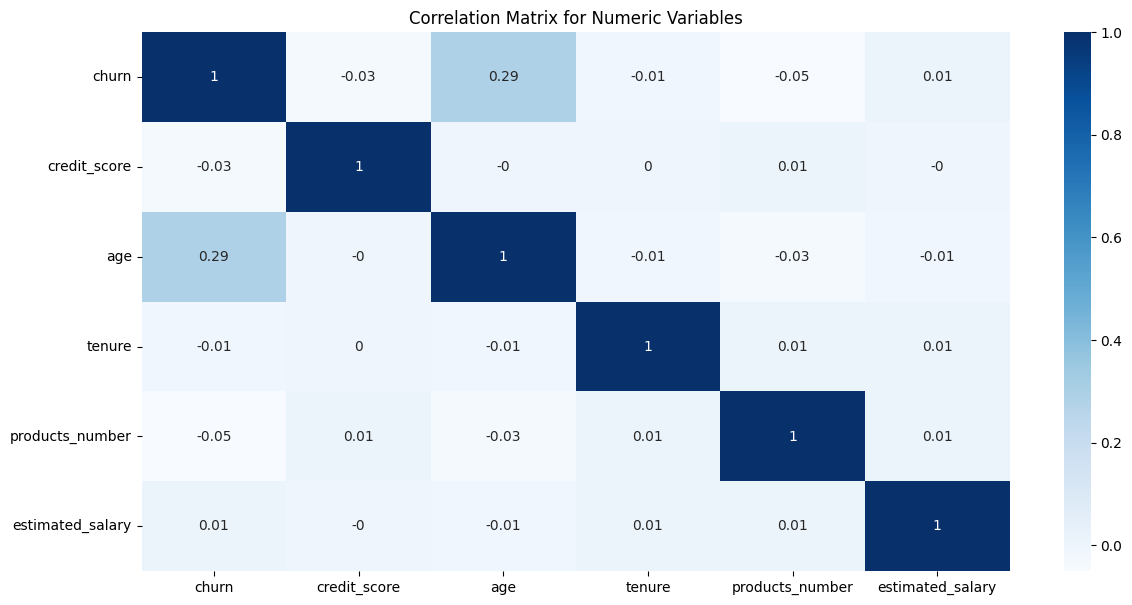

In [26]:
plt.figure(figsize = (14,7))
sns.heatmap(corr_matrix, annot=True, cmap='Blues')
plt.title(label="Correlation Matrix for Numeric Variables")
plt.show()

**Variable Selection**

In [27]:
data2.head()

,churn,credit_score,age,tenure,products_number,credit_card,active_member,estimated_salary,Female,Male,France,Germany,Spain,zero_balance
0,1,619,42,2,1,1,1,101348.88,1,0,1,0,0,1
1,0,608,41,1,1,0,1,112542.58,1,0,0,0,1,0
2,1,502,42,8,3,1,0,113931.57,1,0,1,0,0,0
3,0,699,39,1,2,0,0,93826.63,1,0,1,0,0,1
4,0,850,43,2,1,1,1,79084.10,1,0,0,0,1,0


In [28]:
features = data2.columns[1:14]
target = data2.columns[0]
X = data2[features].values
y = data2[target].values

In [29]:
print(X)

[[619.  42.   2. ...   0.   0.   1.]
 [608.  41.   1. ...   0.   1.   0.]
 [502.  42.   8. ...   0.   0.   0.]
 ...
 [709.  36.   7. ...   0.   0.   1.]
 [772.  42.   3. ...   1.   0.   0.]
 [792.  28.   4. ...   0.   0.   0.]]


In [30]:
print(y)

[1 0 1 ... 1 1 0]


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [32]:
np.unique(y_train, return_counts=True)

(array([0, 1]), array([6359, 1641]))

In [33]:
np.unique(y_test, return_counts=True)

(array([0, 1]), array([1604,  396]))

In [34]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [35]:
lasso_glm = LogisticRegressionCV(Cs = [0.0001, 0.0005, 0.001, 0.005, 0.01, .05, .1, .5, 1], cv=10, penalty='l1', solver="liblinear").fit(X_train, y_train)

In [36]:
lasso_glm.C_

array([0.05])

In [37]:
cs = lasso_glm.Cs_
print(cs)

[1.e-04 5.e-04 1.e-03 5.e-03 1.e-02 5.e-02 1.e-01 5.e-01 1.e+00]


In [38]:
scs = lasso_glm.scores_[1]
scs

array([[0.795  , 0.795  , 0.795  , 0.79375, 0.80125, 0.80625, 0.80625,
        0.80375, 0.80375],
       [0.795  , 0.795  , 0.795  , 0.80125, 0.81125, 0.81   , 0.81   ,
        0.8125 , 0.81125],
       [0.795  , 0.795  , 0.795  , 0.80625, 0.80875, 0.82   , 0.82   ,
        0.8175 , 0.8175 ],
       [0.795  , 0.795  , 0.795  , 0.8025 , 0.8075 , 0.80625, 0.80625,
        0.8025 , 0.80125],
       [0.795  , 0.795  , 0.795  , 0.80125, 0.81   , 0.815  , 0.81625,
        0.815  , 0.815  ],
       [0.795  , 0.795  , 0.795  , 0.79625, 0.80625, 0.81125, 0.81   ,
        0.80875, 0.80875],
       [0.795  , 0.795  , 0.795  , 0.79125, 0.80125, 0.80625, 0.80375,
        0.80375, 0.80375],
       [0.795  , 0.795  , 0.795  , 0.8    , 0.81   , 0.8075 , 0.8075 ,
        0.81   , 0.81   ],
       [0.795  , 0.795  , 0.795  , 0.795  , 0.80375, 0.80375, 0.8025 ,
        0.80125, 0.80125],
       [0.79375, 0.79375, 0.79375, 0.795  , 0.80625, 0.81125, 0.8125 ,
        0.81   , 0.81   ]])

In [39]:
scores = np.mean(scs, axis=0)
scores

array([0.794875, 0.794875, 0.794875, 0.79825 , 0.806625, 0.80975 ,
       0.8095  , 0.8085  , 0.80825 ])

Text(0, 0.5, 'Accuracy/Score')

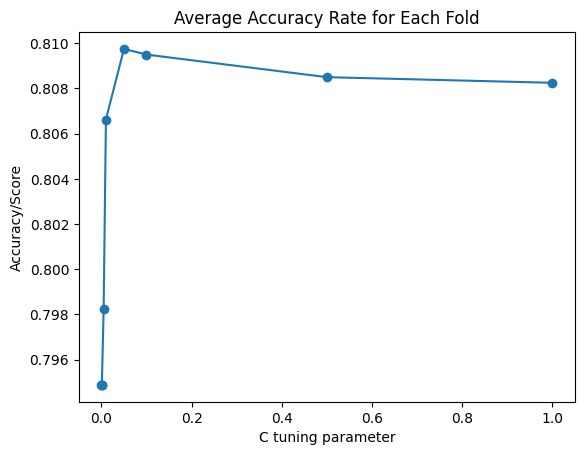

In [40]:
plt.plot(cs, scores, "-o")
plt.title("Average Accuracy Rate for Each Fold")
plt.xlabel("C tuning parameter")
plt.ylabel('Accuracy/Score')

In [41]:
lasso_glm.coef_

array([[-0.01814368,  0.72043628, -0.03486297, -0.04349271, -0.02275415,
        -0.50621877,  0.01562952,  0.04179138, -0.18960524, -0.00106757,
         0.27852812,  0.        , -0.19793572]])

Text(0.5, 1.0, 'Magnitude of Coefficients Determined by Logistic Lasso')

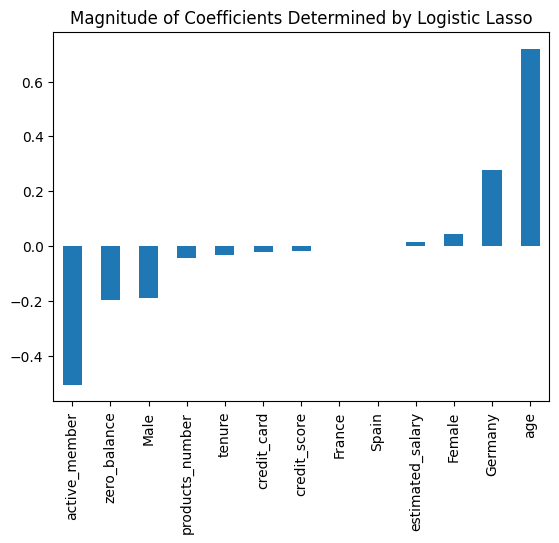

In [42]:
pd.Series(lasso_glm.coef_[0], features).sort_values(ascending = True).plot(kind = "bar")
plt.title("Magnitude of Coefficients Determined by Logistic Lasso")